In [1]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
def keys(f):
    return [key for key in f.keys()]
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift ,ifft
import gwpy
from gwpy.timeseries import TimeSeries
from scipy.interpolate import CubicSpline as spline
#h5py.run_tests()
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c

In [2]:
def analyze(file):
    
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    
    peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
    mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]
    
    for i in range(mx,len(peaks)):
        if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
            mn=i
            break
            
    for i in range(mn,len(peaks)):
        if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
            mx2=i
            break
    
    dt=rh[peaks[mn],0]-rh[peaks[mx],0]
    rhM=abs(rh[peaks[mx2],1])
    return dt,rhM

Example of the way we will do the analysis 

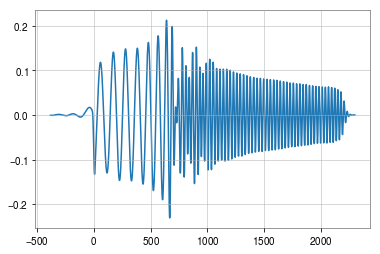

In [4]:
name = 'data/BAM:0036.h5'                                 #change that
file=h5py.File(name,'r')
dat = list(file["/rh_22"])
rh = np.array(file["/rh_22/%s" %dat[-1]])


plt.plot(rh[:,0],rh[:,1])
plt.show()

In [5]:
peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]


In [6]:
for i in range(mx,len(peaks)):
    if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
        mn=i
        break

In [7]:
for i in range(mn,len(peaks)):
    if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
        mx2=i
        break

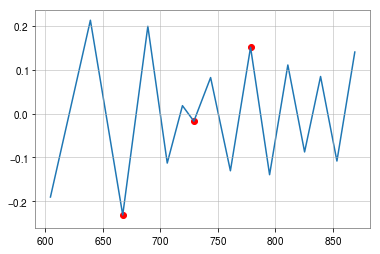

In [8]:
plt.plot(rh[peaks[mx-2:mn+10],0],rh[peaks[mx-2:mn+10],1])
plt.scatter(rh[peaks[mx],0],rh[peaks[mx],1],color='r')
plt.scatter(rh[peaks[mn],0],rh[peaks[mn],1],color='r')
plt.scatter(rh[peaks[mx2],0],rh[peaks[mx2],1],color='r')

In [9]:
dt=rh[peaks[mn],0]-rh[peaks[mx],0]
rhM=abs(rh[peaks[mx2],1])
dt,rhM

(61.811500000000024, 0.1508064)

Do the analysis for the BAM data

In [20]:
dtM=np.zeros(31)
rhM=np.zeros(31)
names=list()
code=np.zeros(31)
l=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'data/BAM:0%s%s%s.h5' %(m,k,j)
            try:
                file=h5py.File(name,'r')
                dtM[l],rhM[l]=analyze(file)
                names.append(name)
                code[l]=m*100+k*10+j
                l=l+1
                
            except OSError:
                pass

In [21]:
for i in range(len(dtM)):
    print(code[i],dtM[i],rhM[i])

2.0 94.58000000000015 0.1403105
3.0 61.22599999999966 0.1715187
4.0 45.45500000000004 0.1875771
9.0 79.68000000000006 0.1160773
10.0 61.924800000000005 0.1769572
22.0 37.833000000000084 0.1829833
35.0 57.659000000000106 0.1587432
36.0 61.811500000000024 0.1508064
46.0 55.87549999999999 0.1324582
48.0 49.45400000000018 0.1304543
53.0 54.302999999999884 0.06831973
57.0 112.48400000000038 0.02148453
58.0 58.98799999999983 0.1931828
59.0 60.08979999999997 0.1500128
61.0 64.64109999999994 0.1400281
65.0 62.07899999999995 0.1868495
70.0 67.63599999999997 0.1468508
80.0 75.2639999999999 0.116459
89.0 58.18100000000004 0.126491
90.0 54.999000000000024 0.1653421
91.0 52.363000000000284 0.1119897
92.0 35.294000000000096 0.1895692
93.0 122.18099999999959 0.05010226
98.0 38.16899999999987 0.1713916
107.0 48.38600000000042 0.1339743
121.0 55.8119999999999 0.1478289
122.0 47.003000000000156 0.1531049
123.0 53.774299999999926 0.1731673
124.0 41.39499999999998 0.08536628
126.0 36.960000000000036 0.123

Read the metadata for the BAM data

In [47]:

SLy=1
H4=2
MS1=3
MPA1=4
ALF2=5
MS1b=6
ms1b=6
ENG=7
#2H=8

In [49]:
q = np.zeros(31)
mas=np.zeros(31)
eos=np.zeros(31)


i=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/BAM:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q[i] = id_mass_ratio
                exec(lines[8])
                mas[i]=id_mass
                if i==0:
                    eos[i]=8 #by hand because 2H can not be given a value
                if i>0:
                    exec(lines[15])
                    eos[i]=id_eos
                
                i=i+1
            except OSError:
                pass



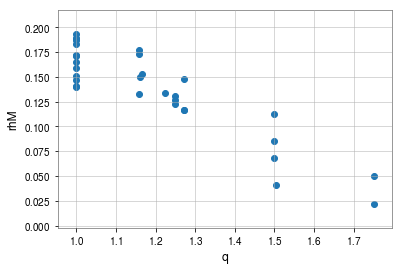

In [62]:
plt.scatter(q,rhM)
plt.xlabel('q')
plt.ylabel('rhM')
plt.show()

Tidal Deformability Analysis

In [50]:
mas12=np.zeros([31,2])
for i in range(31):
    mas12[i,0]=(q[i]*mas[i])/(1+q[i])
    mas12[i,1]=(mas[i])/(1+q[i])

In [51]:
m_r1=np.load('/home/jannis/Documents/pyTOVpp/results/SLy.npy')
m_r2=np.load('/home/jannis/Documents/pyTOVpp/results/H4.npy')
m_r3=np.load('/home/jannis/Documents/pyTOVpp/results/MS1.npy')
m_r4=np.load('/home/jannis/Documents/pyTOVpp/results/MPA1.npy')
m_r5=np.load('/home/jannis/Documents/pyTOVpp/results/ALF2.npy')
m_r6=np.load('/home/jannis/Documents/pyTOVpp/results/MS1b.npy')
m_r7=np.load('/home/jannis/Documents/pyTOVpp/results/ENG.npy')
m_r8=np.load('/home/jannis/Documents/pyTOVpp/results/2H.npy')


k_l1=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_SLy.npy')
k_l2=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_H4.npy')
k_l3=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MS1.npy')
k_l4=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MPA1.npy')
k_l5=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_ALF2.npy')
k_l6=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MS1b.npy')
k_l7=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_ENG.npy')
k_l8=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_2H.npy')

In [57]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])

mx=np.amax(m_r6[0])
idx=np.where(m_r6[0]==mx)
idx=idx[0][0]
cs6=spline(m_r6[0][1:idx],k_l6[0][1:idx])
cs61=spline(m_r6[0][1:idx],m_r6[1][1:idx])

mx=np.amax(m_r7[0])
idx=np.where(m_r7[0]==mx)
idx=idx[0][0]
cs7=spline(m_r7[0][1:idx],k_l7[0][1:idx])
cs71=spline(m_r7[0][1:idx],m_r7[1][1:idx])

mx=np.amax(m_r8[0])
idx=np.where(m_r8[0]==mx)
idx=idx[0][0]
cs8=spline(m_r8[0][1:idx],k_l8[0][1:idx])
cs81=spline(m_r8[0][1:idx],m_r8[1][1:idx])

In [58]:
k212=np.zeros([31,2])
r12=np.zeros([31,2])
for i in range(31):
    if eos[i]==1:
        k212[i,0]=cs1(mas12[i,0])
        k212[i,1]=cs1(mas12[i,1])
        r12[i,0]=cs11(mas12[i,0])
        r12[i,1]=cs11(mas12[i,1])
    elif eos[i]==2:
        k212[i,0]=cs2(mas12[i,0])
        k212[i,1]=cs2(mas12[i,1])
        r12[i,0]=cs21(mas12[i,0])
        r12[i,1]=cs21(mas12[i,1])
    elif eos[i]==3:
        k212[i,0]=cs3(mas12[i,0])
        k212[i,1]=cs3(mas12[i,1])
        r12[i,0]=cs31(mas12[i,0])
        r12[i,1]=cs31(mas12[i,1])
    elif eos[i]==4:
        k212[i,0]=cs4(mas12[i,0])
        k212[i,1]=cs4(mas12[i,1])
        r12[i,0]=cs41(mas12[i,0])
        r12[i,1]=cs41(mas12[i,1])
    elif eos[i]==5:
        k212[i,0]=cs5(mas12[i,0])
        k212[i,1]=cs5(mas12[i,1])
        r12[i,0]=cs51(mas12[i,0])
        r12[i,1]=cs51(mas12[i,1])
    elif eos[i]==6:
        k212[i,0]=cs6(mas12[i,0])
        k212[i,1]=cs6(mas12[i,1])
        r12[i,0]=cs61(mas12[i,0])
        r12[i,1]=cs61(mas12[i,1])
    elif eos[i]==7:
        k212[i,0]=cs7(mas12[i,0])
        k212[i,1]=cs7(mas12[i,1])
        r12[i,0]=cs71(mas12[i,0])
        r12[i,1]=cs71(mas12[i,1])
    elif eos[i]==8:
        k212[i,0]=cs8(mas12[i,0])
        k212[i,1]=cs8(mas12[i,1])
        r12[i,0]=cs81(mas12[i,0])
        r12[i,1]=cs81(mas12[i,1])
    

In [59]:
l=np.zeros([31,2])
lamda=np.zeros(31)
for i in range(31):
    l[i,0]=(2.0/3.0)*k212[i,0]*(1.0/pow(mas12[i,0]/r12[i,0],5))
    l[i,1]=(2.0/3.0)*k212[i,1]*(1.0/pow(mas12[i,1]/r12[i,1],5))
    lamda[i]=(16/13)*( ( (mas12[i,0]+12*mas12[i,1])*pow(mas12[i,0],4)*l[i,0]+(mas12[i,1]+12*mas12[i,0])*pow(mas12[i,1],4)*l[i,1] )/pow( mas12[i,0]+mas12[i,1],5 ) )

In [61]:
for i in range(31):
    print(code[i],'|',eos[i],'|',lamda[i])

2.0 | 8.0 | 2228.66078013686
3.0 | 5.0 | 711.998448595807
4.0 | 5.0 | 709.0777160383772
9.0 | 5.0 | 1115.4811046642862
10.0 | 5.0 | 717.364126949879
22.0 | 7.0 | 462.5425468490587
35.0 | 2.0 | 1070.235704031977
36.0 | 2.0 | 1067.914772779719
46.0 | 2.0 | 1087.326046087623
48.0 | 2.0 | 986.7813565945231
53.0 | 2.0 | 1058.950440252139
57.0 | 2.0 | 1158.0790779591039
58.0 | 4.0 | 589.6281506150176
59.0 | 3.0 | 1702.9762578692325
61.0 | 3.0 | 1677.6640800914543
65.0 | 6.0 | 1490.1295856942913
70.0 | 6.0 | 1351.4816453111982
80.0 | 6.0 | 2278.7914390875317
89.0 | 6.0 | 1381.5360583349461
90.0 | 6.0 | 584.2906021518363
91.0 | 6.0 | 1444.825305970212
92.0 | 6.0 | 409.4810710177216
93.0 | 6.0 | 1528.5289209665073
98.0 | 1.0 | 377.25949228092526
107.0 | 1.0 | 697.543578955504
121.0 | 1.0 | 641.9781234935981
122.0 | 1.0 | 490.15820421895046
123.0 | 1.0 | 384.20370949060646
124.0 | 1.0 | 697.6233331095921
126.0 | 1.0 | 352.0189992304683
128.0 | 1.0 | 392.5763389563371


In [63]:
np.save('lamda.npy',lamda)

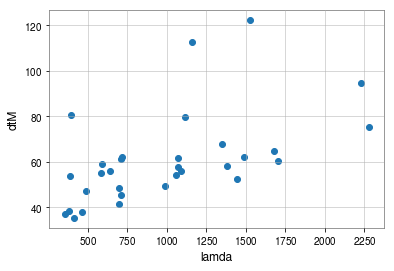

In [65]:
plt.scatter(lamda,dtM)
plt.xlabel('lamda')
plt.ylabel('dtM')
plt.show()